In [1]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.geochemistry.PEC as pec
import pandas as pd
import elements as e
import matplotlib.pyplot as plt
import meltInc.plotting as p

p.layout()
config = pec.PEC_configuration()
config.print()

############## Post-entrapment modification #############
#################### correction model ###################

Settings________________________________________________
Stepsize equilibration (moles)......................0.002
Stepsize crystallisation (moles)....................0.005
Decrease factor.....................................5    
FeO convergence (wt. %).............................0.05 
Kd convergence......................................0.001
Temperature convergence (°).........................0.1  


In [2]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')
olivine = mp.read_olivine('./olivine.csv', index_col=['name'], total_col="total")

In [3]:
forsterites = olivine.forsterite
inclusions = melt.iloc[[0,1], :].copy()
ol_host = olivine.iloc[[0,1], :].copy()
Fo = 0.9
FeO_initial = 11.2
P_bar = 2e3

In [4]:
equilibrated_inclusions = mp.MagmaFrame(index=inclusions.index, columns=inclusions.columns, dtype=float, units="wt. %", datatype="oxide")
ol_equilibrated = pd.Series(index=inclusions.index, dtype=float)

for (idx, mi), (_, ol) in zip(inclusions.iterrows(), ol_host.iterrows()):

    x, oc, kd = pec.Fe_equilibrate(mi, ol, P_bar)
    equilibrated_inclusions.loc[idx] = x.iloc[-1]
    ol_equilibrated.loc[idx] = oc

In [5]:
equilibrated_inclusions

,SiO2,Al2O3,MgO,CaO,FeO,Na2O,K2O,MnO,TiO2,SO3,P2O5,Cl,Cr2O3,CO2,H2O,total
name,,,,,,,,,,,,,,,,
PI032-01-01,50.849184,15.711115,5.274111,11.036782,8.306921,4.184944,0.924506,0.126366,2.733596,0.345907,0.436220,0.070349,0.0,0.0,0.0,100.0
PI032-01-04,46.011854,16.299718,5.639983,11.767731,9.462865,3.813415,1.488855,0.156891,4.098980,0.560157,0.628531,0.071019,0.0,0.0,0.0,100.0


In [6]:
ol_equilibrated

name
PI032-01-01    0.0036
PI032-01-04   -0.0035
dtype: float64

In [7]:
corrected_inclusions = mp.Melt(index=inclusions.index, columns=inclusions.columns, dtype=float, units="wt. %", datatype="oxide")
ol_crystallised = pd.Series(index=inclusions.index, dtype=float)

for (idx, mi), (_, ol) in zip(equilibrated_inclusions.iterrows(), ol_host.iterrows()):

    x2, oc2, kd2, t = pec.crystallisation_correction(mi, ol, FeO_initial, P_bar)
    corrected_inclusions.loc[idx] = x2.iloc[-1]
    ol_crystallised.loc[idx] = oc2

In [15]:
ol_crystallised + ol_equilibrated

name
PI032-01-01    0.1136
PI032-01-04    0.0615
dtype: float64

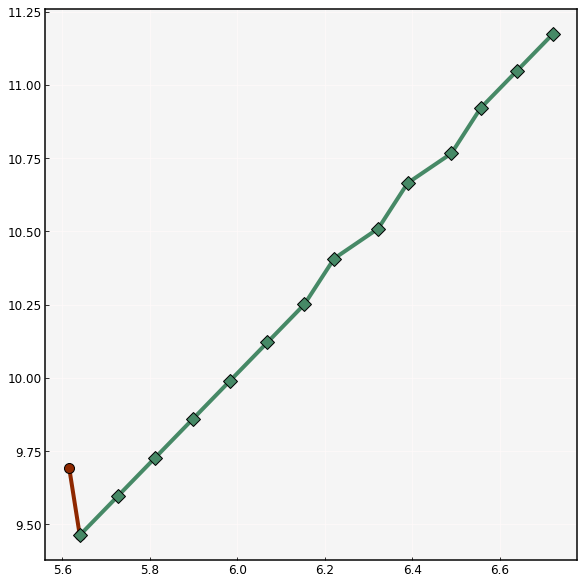

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(x["MgO"], x["FeO"], "-o")
plt.plot(x2["MgO"], x2["FeO"], "-D")


In [10]:
t = pec.PEC_olivine(inclusions, ol_host, P_bar, FeO_initial)

In [11]:
t.Fe_equilibrate(inplace=True)

T correction 09

In [12]:
x3, om, t2 = t.correct_olivine()

[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    False
dtype: bool
name
PI032-01-01    0.005
PI032-01-04    0.005
dtype: float64
[ True  True] name
PI032-01-01    False
PI032-01-04    

In [13]:
om

name
PI032-01-01    0.1136
PI032-01-04    0.0615
dtype: float64

In [14]:
ol_crystallised

name
PI032-01-01    0.110
PI032-01-04    0.065
dtype: float64